# Importing Libraries & Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

Data Information

In [2]:
data=pd.read_csv(r'Language Detection.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
data.shape

(10337, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
data.describe(include='O').transpose()

,count,unique,top,freq
Text,10337,10267,Jag är ledsen.,3
Language,10337,17,English,1385


In [6]:
data.isna().sum()

Text        0
Language    0
dtype: int64

In [7]:
data['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

# Visualizing target labels

Text(0.5, 1.0, 'Target Labels')

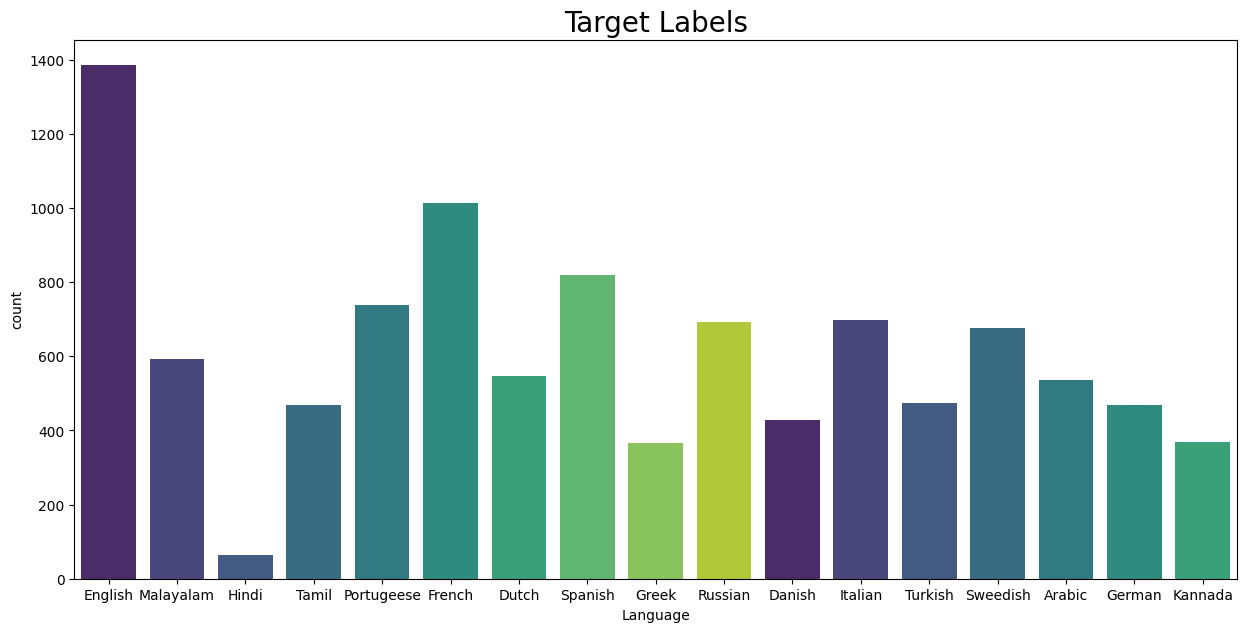

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(x='Language',data=data,palette=sns.color_palette("viridis", 10))
plt.title('Target Labels',fontsize=20)

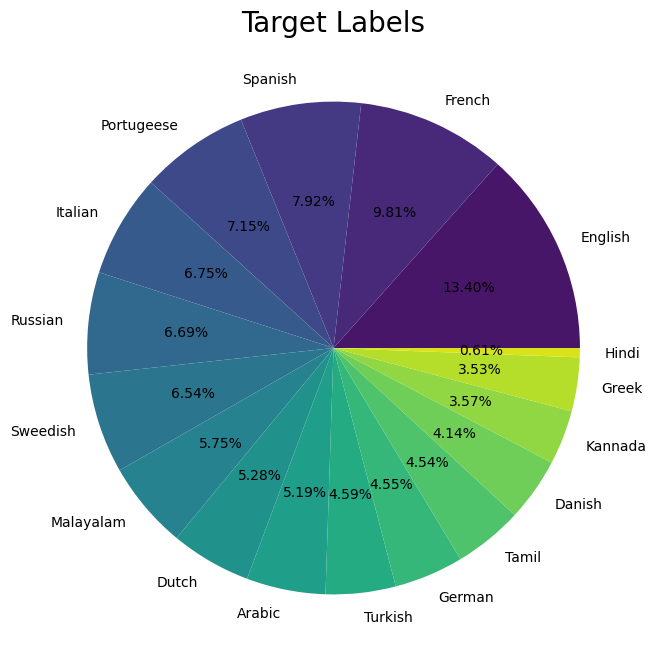

In [9]:
plt.figure(figsize=(10, 8))
plt.pie(x=data['Language'].value_counts(), autopct='%1.2f%%', labels=data['Language'].value_counts().index, colors=sns.color_palette("viridis", len(data['Language'].value_counts())))
plt.title('Target Labels', fontsize=20)
plt.show()

Splitting target columns and other columns

In [10]:
X=data.iloc[:,0]
y=data.iloc[:,-1]

In [11]:
X

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [12]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [13]:
import pickle
pickle.dump(data,open("dataset.pkl", "wb"))

# Data Pre-Processing & Visualization

In [14]:
def word_token(sentence,flage=0):
    token=word_tokenize(sentence)
    if flage==1:
        return token
    return '  ||  '.join(token)

def remove_stop_word(sentence):
    stop_words = stopwords.words('english')
    punct = list(punctuation)
    token=word_token(sentence,1)
    words=[]
    for word in token:
        if  word not in punct and not word.isdigit() :
            words.append(word.lower())
    return words  

def pos(sentence):
    nlp = spacy.load('en_core_web_sm')
    for w , m in nltk.pos_tag(word_token(sentence,1)):
           print(f'word : ({w}), type : ({m}) , means : ({spacy.explain(m)})')

def Stemming(sentence): 
    snowball = SnowballStemmer(language='english')
    for word in word_token(sentence,1):
        print(word,"--->",snowball.stem(word))

def NER_word(sentence):
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    if doc.ents:
        for token in doc.ents:
            print(token.text , ' : ' ,  token.label_ , ' : ' , str(spacy.explain(token.label_)))
    else:
        print('No named entities found.') 
        
def Visualization(sentence): 
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 80})
    displacy.render(doc, style='ent', jupyter=True)

1. Word Tokenization

In [15]:
for i in range(5):
    print("Tokenized Sentence: \n",word_token(X[i]))
    print('*'*40)
    print()

Tokenized Sentence: 
 Nature  ||  ,  ||  in  ||  the  ||  broadest  ||  sense  ||  ,  ||  is  ||  the  ||  natural  ||  ,  ||  physical  ||  ,  ||  material  ||  world  ||  or  ||  universe  ||  .
****************************************

Tokenized Sentence: 
 ``  ||  Nature  ||  ''  ||  can  ||  refer  ||  to  ||  the  ||  phenomena  ||  of  ||  the  ||  physical  ||  world  ||  ,  ||  and  ||  also  ||  to  ||  life  ||  in  ||  general  ||  .
****************************************

Tokenized Sentence: 
 The  ||  study  ||  of  ||  nature  ||  is  ||  a  ||  large  ||  ,  ||  if  ||  not  ||  the  ||  only  ||  ,  ||  part  ||  of  ||  science  ||  .
****************************************

Tokenized Sentence: 
 Although  ||  humans  ||  are  ||  part  ||  of  ||  nature  ||  ,  ||  human  ||  activity  ||  is  ||  often  ||  understood  ||  as  ||  a  ||  separate  ||  category  ||  from  ||  other  ||  natural  ||  phenomena  ||  .
****************************************

Token

2. Removing Stopwords

In [16]:
for i in range(5):
    print('Before Removing Stopwords: ')
    print(word_token(X[i]))
    print('After Removing Stopwords: ')
    print(remove_stop_word(X[i]))
    print('*'*40)
    print()

Before Removing Stopwords: 
Nature  ||  ,  ||  in  ||  the  ||  broadest  ||  sense  ||  ,  ||  is  ||  the  ||  natural  ||  ,  ||  physical  ||  ,  ||  material  ||  world  ||  or  ||  universe  ||  .
After Removing Stopwords: 
['nature', 'in', 'the', 'broadest', 'sense', 'is', 'the', 'natural', 'physical', 'material', 'world', 'or', 'universe']
****************************************

Before Removing Stopwords: 
``  ||  Nature  ||  ''  ||  can  ||  refer  ||  to  ||  the  ||  phenomena  ||  of  ||  the  ||  physical  ||  world  ||  ,  ||  and  ||  also  ||  to  ||  life  ||  in  ||  general  ||  .
After Removing Stopwords: 
['``', 'nature', "''", 'can', 'refer', 'to', 'the', 'phenomena', 'of', 'the', 'physical', 'world', 'and', 'also', 'to', 'life', 'in', 'general']
****************************************

Before Removing Stopwords: 
The  ||  study  ||  of  ||  nature  ||  is  ||  a  ||  large  ||  ,  ||  if  ||  not  ||  the  ||  only  ||  ,  ||  part  ||  of  ||  science  ||  .


In [17]:
X_clean=[]
for sentence in X:
    X_clean.append(' '.join(remove_stop_word(sentence)))
pd.DataFrame(np.array(X_clean),columns=['Text'])

,Text
0,nature in the broadest sense is the natural ph...
1,`` nature '' can refer to the phenomena of the...
2,the study of nature is a large if not the only...
3,although humans are part of nature human activ...
4,the word nature is borrowed from the old frenc...
...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


3. POS Tagging

In [18]:
for i in range(5):
    pos(X_clean[i])
    print('*'*40)

word : (nature), type : (NN) , means : (noun, singular or mass)
word : (in), type : (IN) , means : (conjunction, subordinating or preposition)
word : (the), type : (DT) , means : (determiner)
word : (broadest), type : (JJS) , means : (adjective, superlative)
word : (sense), type : (NN) , means : (noun, singular or mass)
word : (is), type : (VBZ) , means : (verb, 3rd person singular present)
word : (the), type : (DT) , means : (determiner)
word : (natural), type : (JJ) , means : (adjective (English), other noun-modifier (Chinese))
word : (physical), type : (JJ) , means : (adjective (English), other noun-modifier (Chinese))
word : (material), type : (NN) , means : (noun, singular or mass)
word : (world), type : (NN) , means : (noun, singular or mass)
word : (or), type : (CC) , means : (conjunction, coordinating)
word : (universe), type : (NN) , means : (noun, singular or mass)
****************************************
word : (``), type : (``) , means : (opening quotation mark)
word : (nat

4. Stemming

In [19]:
for i in range(5):
    print("Sentence:")
    Stemming(X_clean[i])
    print('*'*40)

Sentence:
nature ---> natur
in ---> in
the ---> the
broadest ---> broadest
sense ---> sens
is ---> is
the ---> the
natural ---> natur
physical ---> physic
material ---> materi
world ---> world
or ---> or
universe ---> univers
****************************************
Sentence:
`` ---> ``
nature ---> natur
`` ---> ``
can ---> can
refer ---> refer
to ---> to
the ---> the
phenomena ---> phenomena
of ---> of
the ---> the
physical ---> physic
world ---> world
and ---> and
also ---> also
to ---> to
life ---> life
in ---> in
general ---> general
****************************************
Sentence:
the ---> the
study ---> studi
of ---> of
nature ---> natur
is ---> is
a ---> a
large ---> larg
if ---> if
not ---> not
the ---> the
only ---> onli
part ---> part
of ---> of
science ---> scienc
****************************************
Sentence:
although ---> although
humans ---> human
are ---> are
part ---> part
of ---> of
nature ---> natur
human ---> human
activity ---> activ
is ---> is
often ---> ofte

5. NER 

In [20]:
for i in range(5):
    print("Sentence: ")
    NER_word(X_clean[i])
    print('*'*40)

# for i in np.random.randint(0,10337,5):
#     print("Sentence: ")
#     NER_word(X_clean[i])
#     print('*'*40)

Sentence: 
No named entities found.
****************************************
Sentence: 
No named entities found.
****************************************
Sentence: 
No named entities found.
****************************************
Sentence: 
No named entities found.
****************************************
Sentence: 
french  :  NORP  :  Nationalities or religious or political groups
latin  :  NORP  :  Nationalities or religious or political groups
****************************************


In [21]:
for i in range(2):
    Visualization(X_clean[i])
    print('*' * 100)

****************************************************************************************************


****************************************************************************************************


# TFIDF Vectorization

In [22]:
tfid=TfidfVectorizer()
PipelineModel = Pipeline([('tfid',tfid)])
X_input=PipelineModel.fit_transform(X_clean)
X_input = pd.DataFrame.sparse.from_spmatrix(X_input)
X_input

,0,1,2,3,4,5,6,7,8,9,...,39561,39562,39563,39564,39565,39566,39567,39568,39569,39570
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
for feature in tfid.get_feature_names_out():
    print(feature, end=' & ')

# for feature in tfid.get_feature_names():
#     print(feature,end=' & ')

00 & 000 & 000க & 001 & 001097666virtual & 004 & 020 & 03 & 08 & 10 & 100 & 10000 & 1013 & 11 & 1114 & 113 & 115 & 12 & 1203 & 122 & 13 & 137 & 13th & 14 & 1408 & 141 & 15 & 150 & 15e & 15ന & 16ന & 17 & 18 & 1800s & 19 & 190 & 1959ൽ & 1960s & 1970s & 1980s & 1988 & 1990s & 1999 & 1er & 20 & 200 & 2000 & 2001 & 2002 & 2003 & 2004 & 2005 & 2006 & 2007 & 2008 & 2009 & 2010 & 2010s & 2011 & 2012 & 2013 & 2014 & 2015 & 2016 & 2017 & 2019 & 2020 & 2021 & 21 & 21st & 22 & 23 & 235 & 237 & 238 & 240 & 25 & 26 & 264 & 268 & 27 & 274301 & 28 & 281 & 30 & 300 & 31 & 321 & 33 & 330 & 34 & 345 & 35 & 352 & 36 & 37 & 38 & 39 & 395 & 399 & 399677 & 3d & 3g & 3k & 40 & 41 & 42 & 43 & 4499779 & 45 & 456 & 46 & 465 & 47 & 473 & 488 & 49 & 4de & 4e & 50 & 500 & 51 & 512 & 52 & 530 & 54 & 540 & 55 & 555 & 56 & 58 & 588 & 59 & 597 & 5e & 60 & 605 & 61 & 618 & 63 & 639 & 672 & 68 & 6bibliotheek & 700 & 7000 & 708 & 71 & 710 & 721 & 723 & 727 & 73 & 74 & 747 & 75 & 76 & 77 & 78 & 78697 & 80 & 800 & 820 & 838

In [24]:
pd.DataFrame(tfid.get_feature_names_out(),columns=['Feature Names'])

,Feature Names
0,00
1,000
2,000க
3,001
4,001097666virtual
...,...
39566,ൽപ
39567,ൽവർ
39568,ൾക
39569,ൾപ


Assigning each target variable unique number

In [25]:
dic={}
i=0
for word in pd.unique(y):
    dic[word]=i
    i+=1
def get_code(N):
    for x,y in dic.items():
        if y==N:
            return x
dic    

{'English': 0,
 'Malayalam': 1,
 'Hindi': 2,
 'Tamil': 3,
 'Portugeese': 4,
 'French': 5,
 'Dutch': 6,
 'Spanish': 7,
 'Greek': 8,
 'Russian': 9,
 'Danish': 10,
 'Italian': 11,
 'Turkish': 12,
 'Sweedish': 13,
 'Arabic': 14,
 'German': 15,
 'Kannada': 16}

In [26]:
# import pickle
# with open('label_mapping.pkl', 'wb') as file:
#     pickle.dump(dic, file)

In [27]:
label=[]
for word in y:
    label.append(dic[word])
label=pd.DataFrame(label,columns=['langauge'])    
label

,langauge
0,0
1,0
2,0
3,0
4,0
...,...
10332,16
10333,16
10334,16
10335,16


# Splitting Dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_input, label, test_size=0.1, random_state=33)
print('X train shape is :',X_train.shape)
print('X test shape is :',X_test.shape)
print('y test shape is :',y_train.shape)
print('y test shape is :',y_test.shape)

X train shape is : (9303, 39571)
X test shape is : (1034, 39571)
y test shape is : (9303, 1)
y test shape is : (1034, 1)


# Building Language Detection Model

In [29]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(17, activation=tf.nn.softmax)
                                   ])

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train, y_train, epochs=5)

Epoch 1/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 39s 129ms/step - accuracy: 0.6207 - loss: 1.3094
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.9934 - loss: 0.0275
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 53s 183ms/step - accuracy: 0.9970 - loss: 0.0130
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 46s 157ms/step - accuracy: 0.9972 - loss: 0.0093
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 42s 145ms/step - accuracy: 0.9978 - loss: 0.0075


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 39571)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    20,260,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,281,845 (233.77 MB)

 Trainable params: 20,427,281 (77.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,854,564 (155.85 MB)

In [32]:
testacc = model.evaluate(X_test,y_test)
print("Testing loss & accuracy: ", testacc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9563 - loss: 0.1736
Testing loss & accuracy:  [0.13729959726333618, 0.9661508798599243]


In [33]:
# accuarcy and loss for each epoch
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,loss
0,0.844889,0.566144
1,0.993658,0.027067
2,0.997205,0.011639
3,0.997098,0.011441
4,0.997205,0.009453


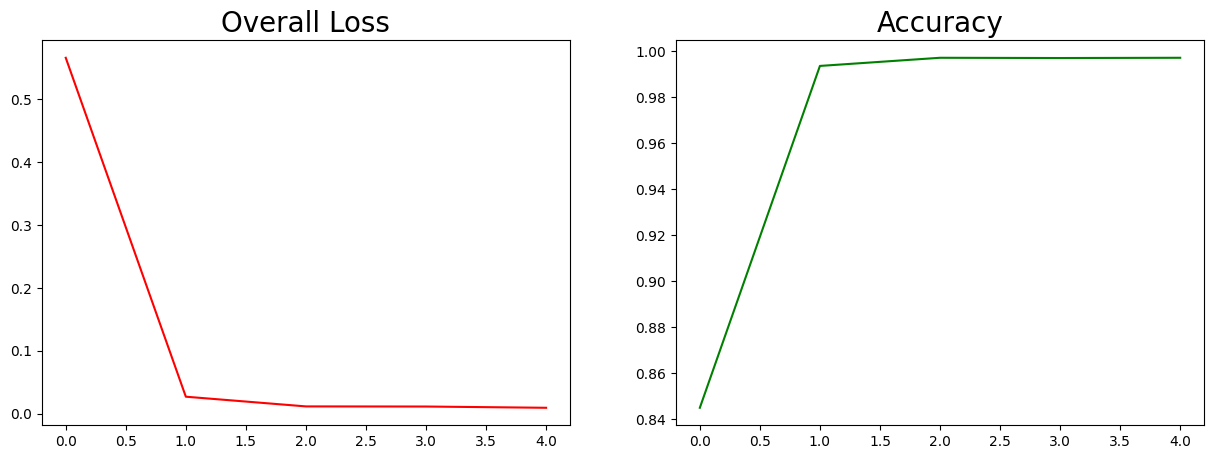

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Overall Loss',fontsize=20)
plt.plot(hist_['loss'],c='r',label='Overall Loss')
plt.subplot(1,2,2)
plt.title('Accuracy',fontsize=20)
plt.plot(hist_['accuracy'],c='g',label='Accuracy')

In [35]:
prediction=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [36]:
y_pred=[]
pred=[]
for row in prediction:
    N=np.argmax(row)
    y_pred.append(N)
    pred.append(get_code(N))
pd.DataFrame(pred,columns=['Predictions'])    

,Predictions
0,Turkish
1,Tamil
2,Turkish
3,Russian
4,Russian
...,...
1029,Portugeese
1030,English
1031,Tamil
1032,English


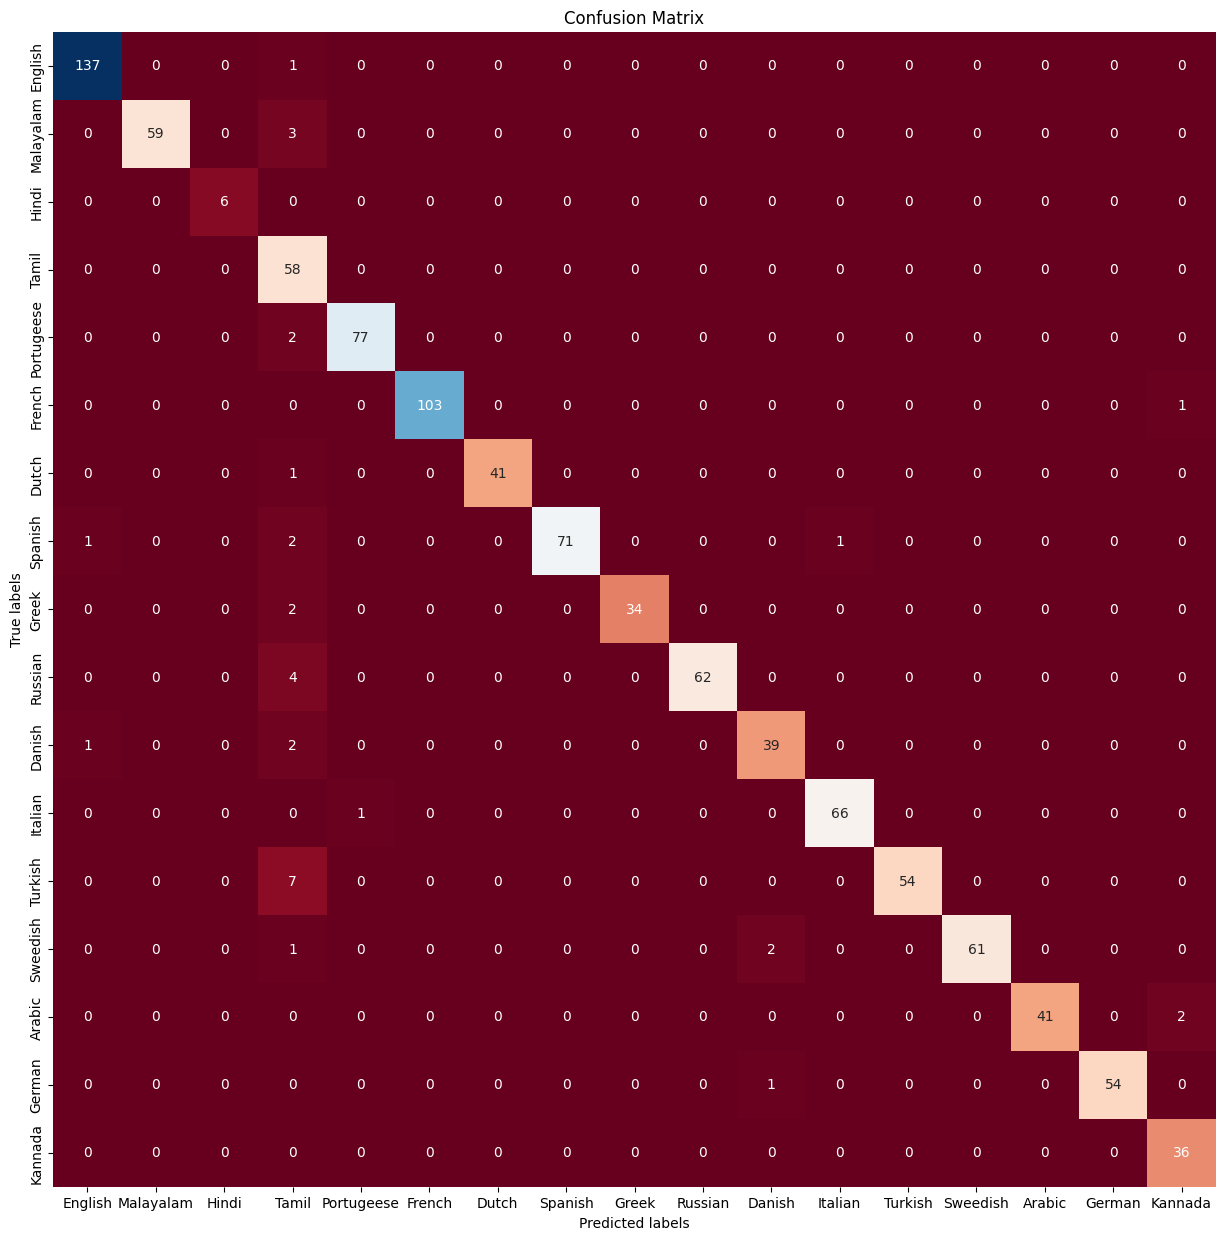

In [37]:
plt.figure(figsize=(15,15))
ax= plt.subplot()
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(dic.keys()) 
ax.yaxis.set_ticklabels(dic.keys())
plt.show()

In [38]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       1.00      0.95      0.98        62
           2       1.00      1.00      1.00         6
           3       0.70      1.00      0.82        58
           4       0.99      0.97      0.98        79
           5       1.00      0.99      1.00       104
           6       1.00      0.98      0.99        42
           7       1.00      0.95      0.97        75
           8       1.00      0.94      0.97        36
           9       1.00      0.94      0.97        66
          10       0.93      0.93      0.93        42
          11       0.99      0.99      0.99        67
          12       1.00      0.89      0.94        61
          13       1.00      0.95      0.98        64
          14       1.00      0.95      0.98        43
          15       1.00      0.98      0.99        55
          16       0.92      1.00      0.96        3

Detecting Language

In [39]:
def prediction_func(sentence):
    sent=' '.join(remove_stop_word(sentence))
    sent=PipelineModel.transform([sent])
    sent=pd.DataFrame.sparse.from_spmatrix(sent)
    return get_code(np.argmax(model.predict(sent)))

In [40]:
# print("Welcome to Language Detection Program!")
# print("Enter a sentence to detect its language.")
    
# while True:
#     sentence = input("Enter a sentence (or 'exit' to quit): ")
        
#     if sentence.lower() == 'exit':
#         print("Exiting the program...")
#         break
        
#     language = prediction_func(sentence)
#     print(f"User enetered: {sentence}")
#     print(f"The language of the sentence is: {language}")

In [41]:
# print("Welcome to Language Detection Program!")
# print("Enter a sentence to detect its language.")
    
# while True:
#     sentence = input("Enter a sentence (or 'exit' to quit): ")
        
#     if sentence.lower() == 'exit':
#         print("Exiting the program...")
#         break
        
#     language = prediction_func(sentence)
#     print(f"User enetered: {sentence}")
#     print(f"The language of the sentence is: {language}")

More examples of Detecting Language

In [42]:
#English
prediction_func('hello my this is our project!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'English'

In [43]:
#German - hello this is german language
prediction_func('Hallo, das ist deutsche Sprache')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'German'

In [44]:
#Dutch - I need to talk to you
prediction_func('Ik moet met je praten')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


'Dutch'

In [45]:
prediction_func('यह हमारा एनएलपी प्रोजेक्ट है')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


'Hindi'

In [46]:


prediction_func('ಇದು ನಮ್ಮ nlp ಯೋಜನೆಯಾಗಿದೆ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'Kannada'

# Saving the Model

In [47]:
# import pickle
# pickle.dump(model,open("language-model.pkl", "wb"))

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'